In [7]:
import matplotlib.pyplot as plt

# Data provided by the user
data = {'Oilseed': ['Soybean', 'Rapeseed', 'Sunflower seed', 'Peanut (Groundnut)', 'Cottonseed', 'Palm kernel', 'Copra (Coconut)', 'Palm', 'Olive'],
        'Estimated World Production': ['390 - 410', '80 - 85', '60 - 65', '55 - 60', '45 - 50', '17 - 22', '7 - 9', '80 - 85', '3.5 - 4']}


# Extracting the oilseed names and calculating the mid-point of the consumption ranges
oilseeds = data['Oilseed']
consumption_ranges = data['Estimated World Consumption']
consumption_midpoints = [(float(rng.split('-')[0]) + float(rng.split('-')[1])) / 2 for rng in consumption_ranges]

# Creating the pie chart
# plt.figure(figsize=(10, 8))
# plt.pie(consumption_midpoints, labels=oilseeds, autopct='%1.1f%%', startangle=140)
# plt.title('Estimated World Consumption of Different Oilseeds')
# plt.show()


KeyError: 'Estimated World Consumption'

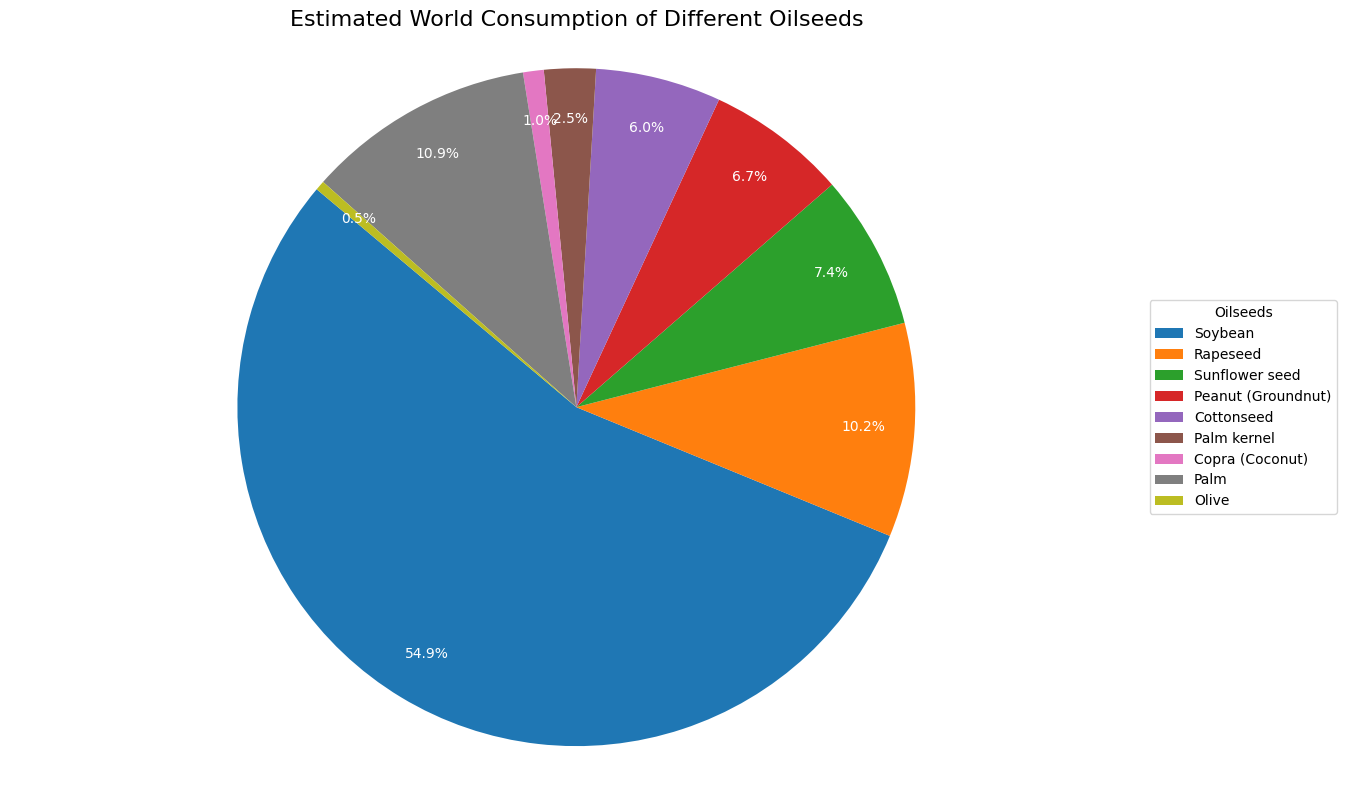

In [8]:
# Creating the pie chart with improved presentation
plt.figure(figsize=(12, 8))

# Creating the pie chart with adjustments
wedges, texts, autotexts = plt.pie(consumption_midpoints, labels=oilseeds, autopct='%1.1f%%', startangle=140, 
                                   textprops=dict(color="w"), pctdistance=0.85)

# Adding legend
plt.legend(wedges, oilseeds, title="Oilseeds", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adding a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adjusting the title and aspect ratio
plt.title('Estimated World Consumption of Different Oilseeds', fontsize=16)
plt.tight_layout()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()
